### Big O Notation

Compute scientists have `borrowed` the concept from mathematics.  
This way we have a `consistent` language around efficiency of algorithms.  
Big O is focusing on the number of steps, but in a `specific` way.

### O(n) Linear Search

Linear search will take as many `steps` as the number of elements in the array.

In [8]:
def linear_search(arr, x):
    steps = 0
    for i in range(len(arr)):
        steps += 1
        if x == arr[i]:
            return i, steps 
    return -1, steps

data = ['apples', 'bananas', 'oranges']
key, steps = linear_search(data, 'oranges')

print('Found at index =', key)
print('N =', len(data))
print('Steps =', steps)

Found at index = 2
N = 3
Steps = 3


### O(log n) Binary Search

For n elements the algorithm increases one step each time the data is `doubled`.

In [13]:
def binary_seach(arr, x):
    left = 0
    right = len(arr) - 1

    steps = 0
    while True:
        
        steps += 1
        m = (left + right) // 2

        if x == arr[m]: 
            return m, steps

        if x > arr[m]: left = m + 1
        if x < arr[m]: right = m - 1

        if left > right:
            return -1, steps

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
key, steps = binary_seach(data, 7)
print("Steps =", steps)

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
key, steps = binary_seach(data, 17)
print("Steps =", steps)

Steps = 4
Steps = 5


### Linear vs Binary

We can make a `graph` in order to campare the performance between the two algorithms.

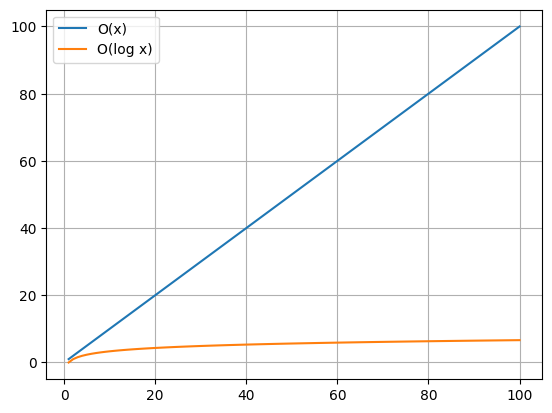

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Generate x values
X = np.linspace(1, 100, 100)

# Generate y values
Y1 = [x for x in X]
Y2 = [math.log(x, 2) for x in X]

# Plot the graph
plt.plot(X, Y1, label='O(x)')
plt.plot(X, Y2, label='O(log x)')
plt.legend()
plt.grid()
plt.show()